# THE LANGUAGE of LIFE EXPECTANCY: 

#### A Natural Language Processing Evaluation of GitHub Repository Content Programming Language

---

**Natural Language Processing Project & Final Report Created By:**  

Chris Teceno, Rachel Robbins-Mayhill, Kristofer Rivera     
  Codeup     **|**     Innis Cohort     **|**     May 2022  

<img src='languages.png' width='1500' height='700' align='center'/>

Rubric (total 50 points):

- 10 points: Overall documentation and code style
- 10 points: Data from at least 100 repos is gathered in a reproducible manner
- 10 points: Data is prepared into a format that can be worked with further
- 10 points: Data Exploration is performed, hypothesis are tested and visualizations are created
- 10 points: Different methods of data preprocessing and different types of models are evaluated with a chosen evaluation metric for predicting repo language from README content.

## Project Goal
The goal of this project is to build a Natural Language Processing (NLP) model that can predict the programming language of projects within specified GitHub repositories, given the text of a README.md file. 

## Project Description

This project was initiated by utilizing web scraping techniques to scrape README files from specified GitHub repositories focused on Life Expectancy projects. The 166 most starred Life Expectancy Repositories, as of May 14, 2022, were used as the documents within the corpus for this NLP project.

After acquiring and preparing the corpus, our team conducted natural language processing exploration methods such as word clouds and bigrams. We employed multiclass classification methods to create multiple machine learning models. The end goal was to create an NLP model that accurately predicted the programming language used in a GitHub repository based on the words and word combinations found in the readme files.

## Initial Thoughts & Hypothesis: 



The initial hypothesis of the project was that repositories using Python would have a higher average word count in comparison to other programming languages. The thought behind this was Python is known for its focus on documentation and has a robust community to support consistent expectations for documentation. We also thought programing languages would have distinct unique words and bigrams (word pairs) that would differentiate one from the other. These thoughts and the subsequent hypothesis drove the initial exploratory questions for this project.

## Initial Questions:

1. What are the most frequently occuring words?
2. Do certain coding languages have more unique words?
3. What are the most frequently occuring bigrams (pairs of words)?
4. Are there any bigrams that uniquely identify one of the coding langauges?
5. Is word count within the README significantly different between the top 4 programming langauges?

## EXECUTIVE SUMMARY

NEED TO COMPLETE

The key findings for this presentation are available in slide format by clicking on the [Final Slide Presentation](https://docs.google.com/presentation/d/1nCXdPCZY16jplddBFYq8YxPd1t2k0y3LHmHjmiocjGQ/edit?usp=sharing).

===============================================================================================================================================

## I. ACQUIRE

### Note about imports:

Imports for this project are added in the sections in which they are required.

In [1]:
# import for acquisition
import os
import json
import requests
import wrangle
import model
from env import github_token, github_username

# import for data manipulation
import pandas as pd
import numpy as np
from typing import Dict, List, Optional, Union, cast

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire data from .json saved and processed using functions found in wrangle.py
df = pd.read_json("data.json")
df.head()

,repo,language,readme_contents
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github..."


In [3]:
# obtain number of columns and rows for original dataframe
df.shape

(166, 3)

## The Original DataFrame Size: 166 rows, or documents, and 3 columns.

=================================================================================================================================================================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the prep_data  function saved within the prepare.py file inside the 'NLP-Project' repository on GitHub. The function takes in the original data.json dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Basic Cleaning: 
    - Make all text lowercase
    - Normalize, encode, and decode to remove accented text and special characters
    - Tokenize strings to break words and punctuation into discrete units
    - Stem and Lemmatize words to acquire base words
    - Remove stopwords
    - Rename columns
---   
- Address missing values, data errors, unnecessary data, and unclear values:
    - Replace Jupyter Notebook values with Python after manually verifying most Jupyter Notebook entires used the Python programming language 
    - Drop missing values to prevent impediments in exploration and modeling: 9 documents/observations that had null values in the language column 
    - Drop all rows where README length was 0
    - Total dropped documents = 32
---    
- Create feature engineered columns:
    - unique words
    - character count
    - word count
    - unique word count
    - most common word count (2nd, 3rd, 4th, 5th most common)

---
- Split corpus into train, validate, and test samples

**Note on Missing Value Handling:**
The missing value removal equated to removing 9 observations/documents, which was about 9\% of the data set. It still left a substantial number of observations above the minimum expectation of 100. If given more time with the data, it is recommended to investigate other ways to impute the missing data.

---

### Results of Data Preparation

In [4]:
# import for prepare
import prepare
import unicodedata
import re

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from time import strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [5]:
# apply the data preparation observations and tasks to clean the data using the prep_data function found in the prepare.py
df = prepare.prep_data(df)
# view first few rows of dataframe
# obtain the number of rows and columns for the updated/cleaned dataframe 
print(df.shape)
df.head()

(134, 13)


,repo,language,original,more_clean,unique_words,char_count,word_count,unique_word_count,most_common_word,2nd_most_common_word,3rd_most_common_word,4th_most_common_word,5th_most_common_word
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...,reduction life expectancy brazil covid provide...,de since impacted absence marcia fig region pu...,2949,352,211,life,expectancy,covid,state,data
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...,animated annual change lifeexpectancy illustra...,life paper result forthcoming degif animated c...,166,16,16,animated,annual,change,lifeexpectancy,illustration
2,sychi77/Thoracic_Surgery_Patient_Survival,Python,# Thoracic Surgery for Lung Cancer Data Set\n ...,thoracic surgery lung cancer data set uci mach...,thoracicsurgery uci taking survival thoracicsu...,2058,234,150,surgery,f,data,lung,thoracic
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Python,# HackerRank Data Scientist Hiring Test: Predi...,hackerrank data scientist hiring test predict ...,represents big region could prediction decidin...,1011,135,86,country,life,expectancy,must,test
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github...",p aligncenter img srchttpsgithubcomoxforddemsc...,herehttpswwwmedrxivorgcontent undertaking src ...,2259,234,172,data,relates,code,p,generic


## Prepared DataFrame Size: 134 rows, or documents, and 13 columns.

---

### PREPARE - SPLIT

In [6]:
# import for split
from sklearn.model_selection import train_test_split

After preparing the corpus, it was split into 3 samples; train, validate, and test using:

- Random State: 123
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the prepare.py file inside the [NLP-Project](https://github.com/Two-Guys-and-a-Gal/NLP-Project) repository on GitHub.

In [7]:
# split the data into train, validate, and test using the split_data function found in the prepare.py
train, validate, test = prepare.split_data(df)
# obtain the number of rows and columns for the splits
train.shape, validate.shape, test.shape

((74, 13), (33, 13), (27, 13))

=================================================================================================================================================================================================================================

## III. EXPLORE

In [8]:
# import for data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import style
from wordcloud import WordCloud
import explore

In [9]:
# Set Universal Visualization Formatting

# determine figure size
plt.rc('figure', figsize=(20, 8))
# determine font size
plt.rc('font', size=15)
# determine style
plt.style.use('seaborn-deep')

After acquiring and preparing the corpus, exploration was conducted. All univariate exploration was completed on the entire cleaned corpus in the workbook for this project. For the purpose of the final report, only the target variable will be displayed in order to reduce noise and provide focused context for the project. Following univariate exploration, the split sets (train, validate, and test samples) were utilized thorugh modeling, where only the train set was used for bivariate and multivariate exploration to prevent data leakage.

---

### UNIVARIATE EXPLORATION

#### UNIVARIATE EXPLORATION of TARGET VARIABLE

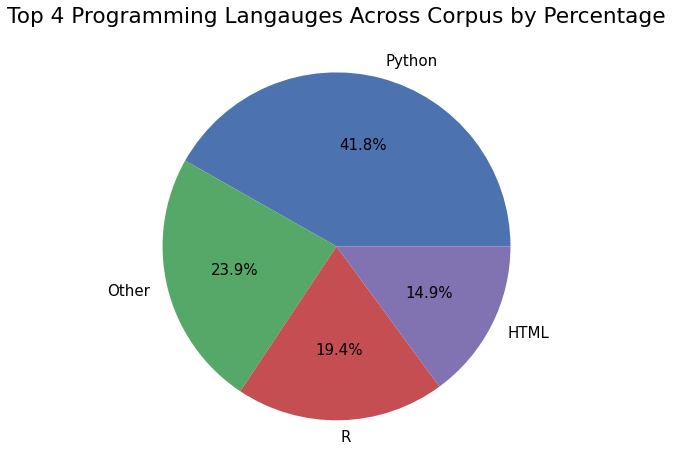

In [10]:
# create visualization
df.language.value_counts().plot(kind='pie', y='Language', autopct="%1.1f%%")
# remove y axis label
plt.ylabel(None)
#add title
plt.title('Top 4 Programming Langauges Across Corpus by Percentage')
plt.show()

**OBSERVATIONS:** 
- Python is the most common language, represented by 42% of the corpus, followed by Other at 24%, R at 19%, and HTML at 15%. 

---

### EXPLORATION

All bivariate exploration was conducted on the train corpus to prevent data leakage. The initial questions and univariate exploration guided the bivariate exploration.

#### EXPLORE QUESTIONS

1. What are the most frequently occuring words?
2. Do certain coding languages have more unique words?
3. Do certain coding languages have more unique bigrams (word pairs)?
4. Are there any bigrams that uniquely identify one of the coding langauges?
5. Is word count within the README significantly different between the top 4 programming langauges?

### QUESTION 1: Most Frequent Words Overall
What are the most frequently occuring words?

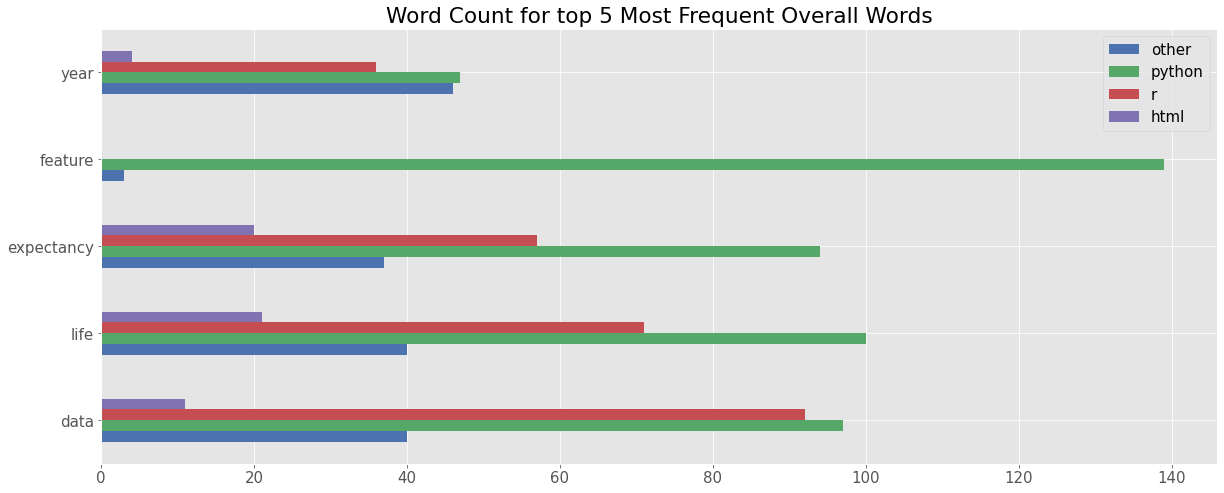

In [11]:
# create visualization using the vis_one_a function found in the explore.py
explore.vis_one_a()

Explain moving from one to the next vis........

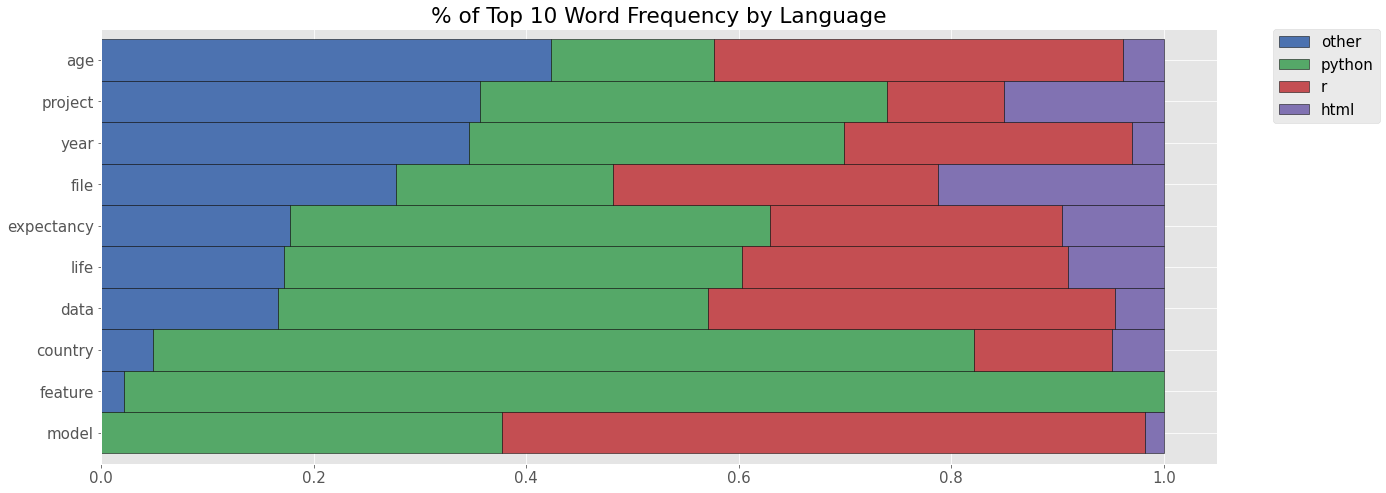

In [12]:
# create visualization using the vis_one_b function found in the explore.py
explore.vis_one_b()

#### ANSWER 1: Most Frequent Words

The 5 most frequently occurring words within the train corpus are: year, country, expectancy, life and data. The words with the most frequency listed across all programming languages were code, project, age, file, year, expectancy, life, data, country, and model. The words that were not computer oriented, more focused on life expectancy and represented across the top four languages were age, year, expectancy, life, and country. The computer oriented words represented by the top four languages were code, project, file, data, and model. 

---

### QUESTION 2: Unique Words
Do certain coding languages have more unique words?

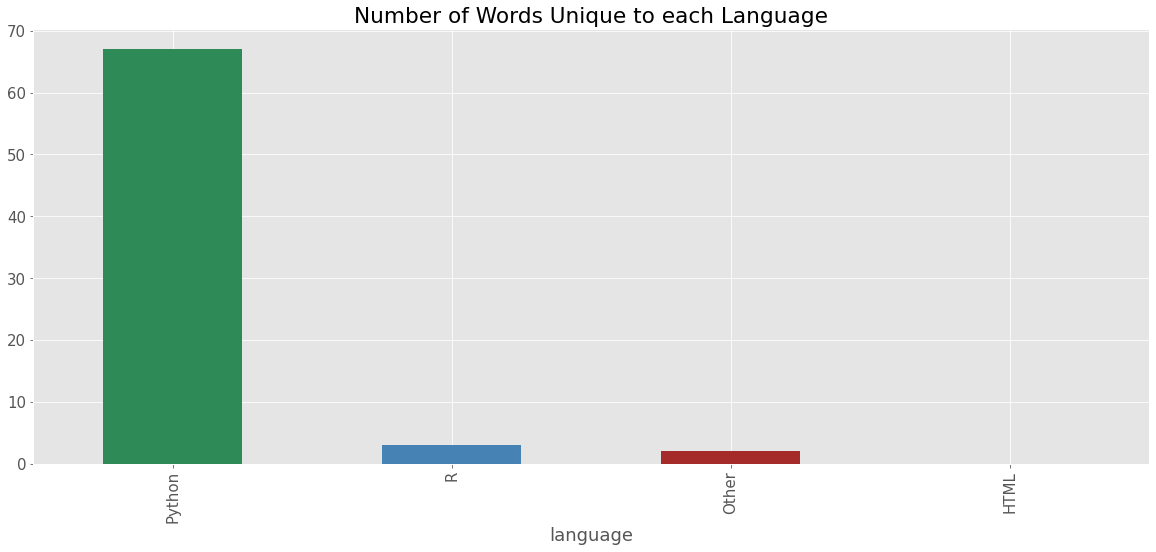

In [13]:
# create visualization using the vis_two function found in the explore.py
explore.vis_two()

#### ANSWER 2: Unique Words
Python has considerably more unique words within the README files in comparison to the other top languages, with over 65, while Other and R have fewer than 5, and HTML has 0 unique words.  

---

### QUESTION 3: Most Unique Bigrams (Word Pairs)
Do certain coding languages have more unique bigrams?

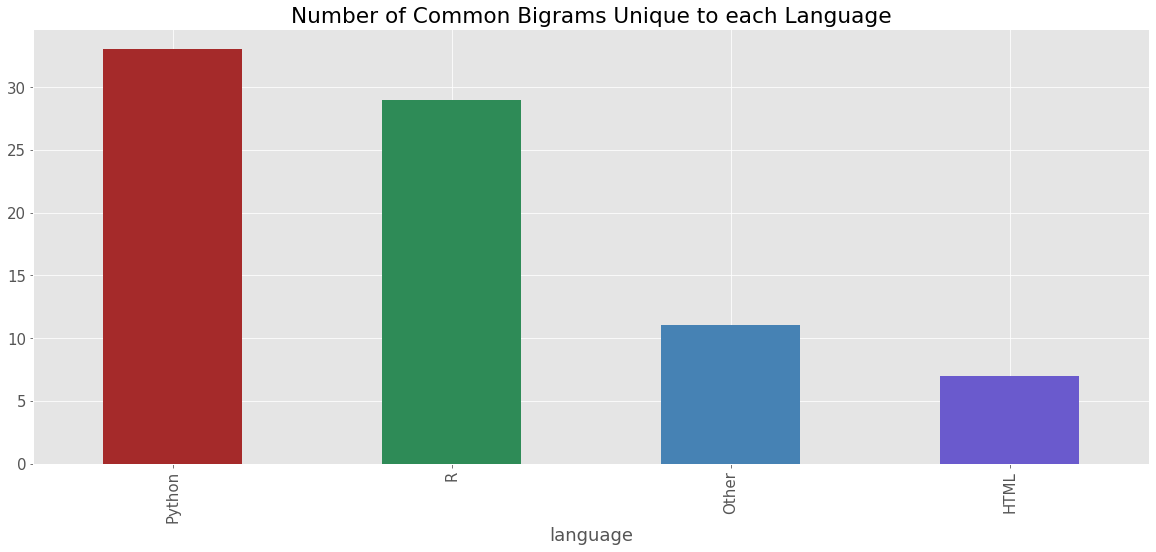

In [14]:
# create visualization using the vis_three function found in the explore.py
explore.vis_three()

#### ANSWER 3: Most Unique Bigrams 
Python has considerably more unique bigrams within the README files in comparison to the other top languages, with over 40 bigrams, while R follows with 27, Other with 12, and HTML with 7 unique bigrams.  

---

### QUESTION 4: Unique Bigrams
Are there any bigrams that uniquely identify one of the coding langauges?

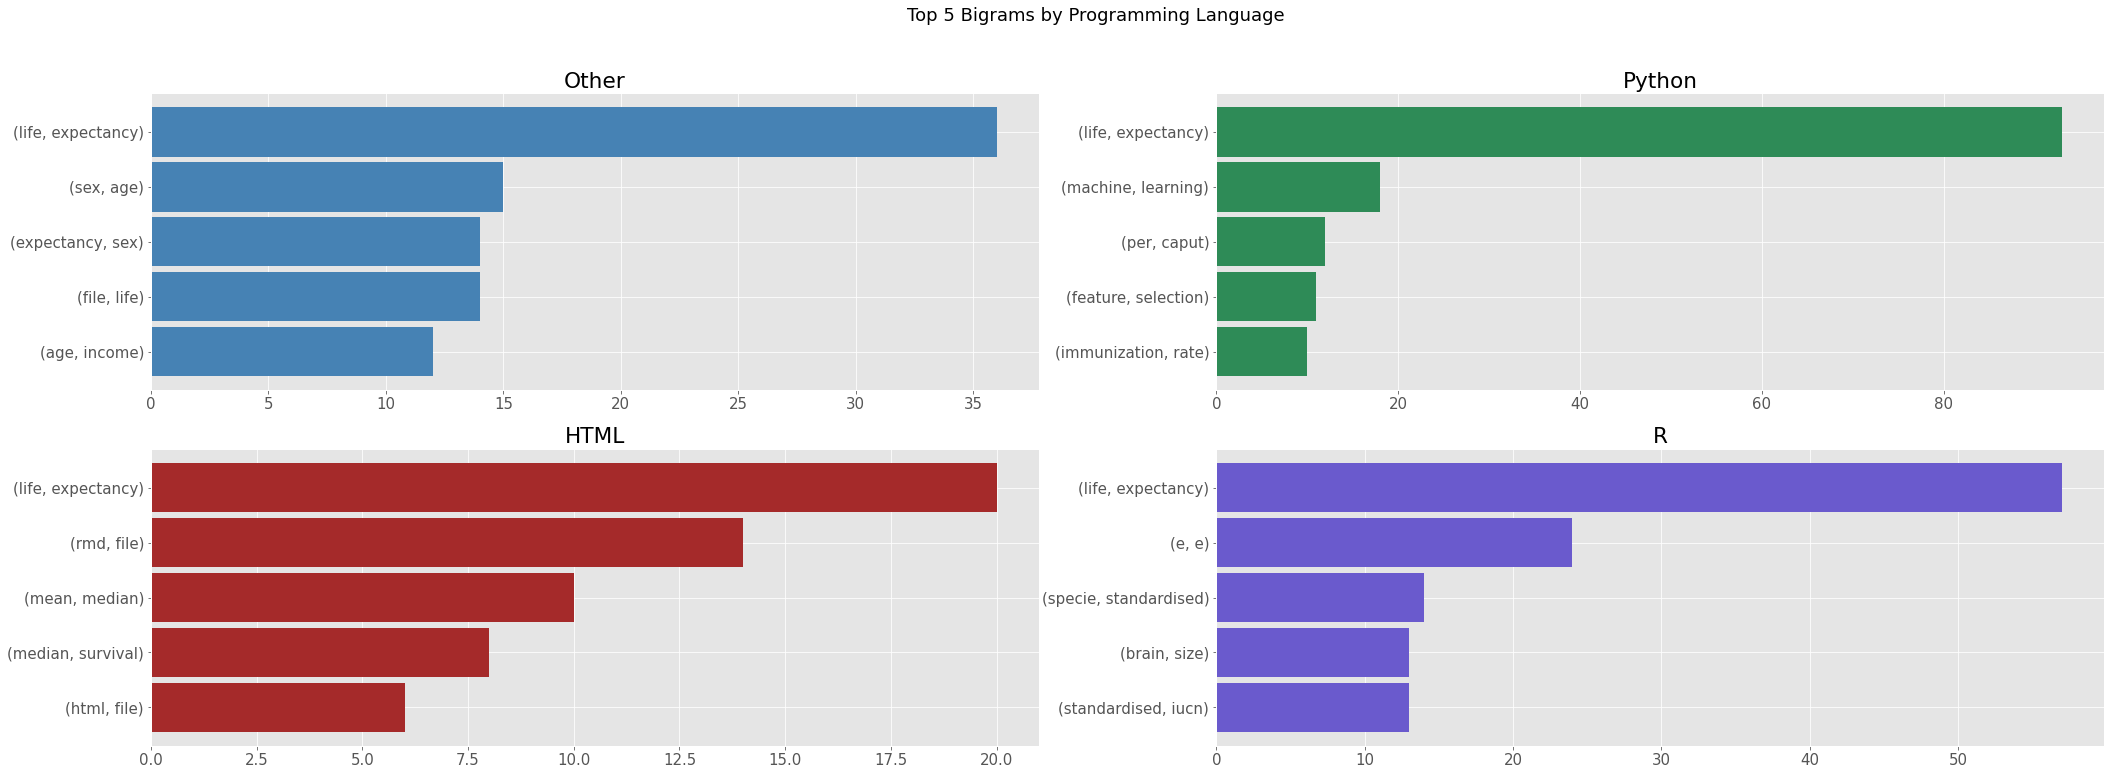

In [15]:
# create visualization using the vis_four function found in the explore.py
explore.vis_four()

#### ANSWER 4: Unique Bigrams
All 4 top programming languages shared the most prevalent bigram, 'life, expectancy', which aligns with the focus of selected documents, given the acquisition focused on repositories with the topic of life expectancy. Following the single most prevalent bigram, the remaining top 4 bigrams were unique to each langauge:

---
Other: 'sex,age', 'expectancy, sex', 'file,life', 'age, income'
- Given the frequency of gender, age, and income, the features of the corpus itself, seem to be a focus of the README labeled as Other
    
---
Python: 'machine, learning', 'per, capit', 'feature, selection', 'immunization, rates'
- README documents utilizing Python Programming seem to have bigrams that frequently describe parts of the Data Science Pipeline that are more focused on the machine learning aspect, such as machine learning and feature selection. Otherwise, they focused on immunization rate and geographic statistics (per capita)
   
---   
HTML: 'rmd, file', 'mean, median', 'median, survival', 'html, file'
- HTML specific README documents had more focus on file types (rmd, html) and on summary statistics (mean, median) 

---
R: 'e, e', 'specie, standardised', 'brain, size', 'standardised, iucn'
- R utilizes the letter e as a bigram frequently. Without more context an e may represent Euler's number within scientific notation. R is commonly used in academic setting for research and statistical analysis which would lend itself to freqent use of scientific notation. Otherwise, R README documents used language specific to R Programming, such as standardised iucn, which may be reference to standardized scaling methodology in R and iucn, as in, IUCN Redlisting Tools, which perform a number of spatial analyses based on either observed occurrences or estimated ranges.

---

### QUESTION 5: Word Count
Is word count within the README significantly different for R vs. all the programming langauges?

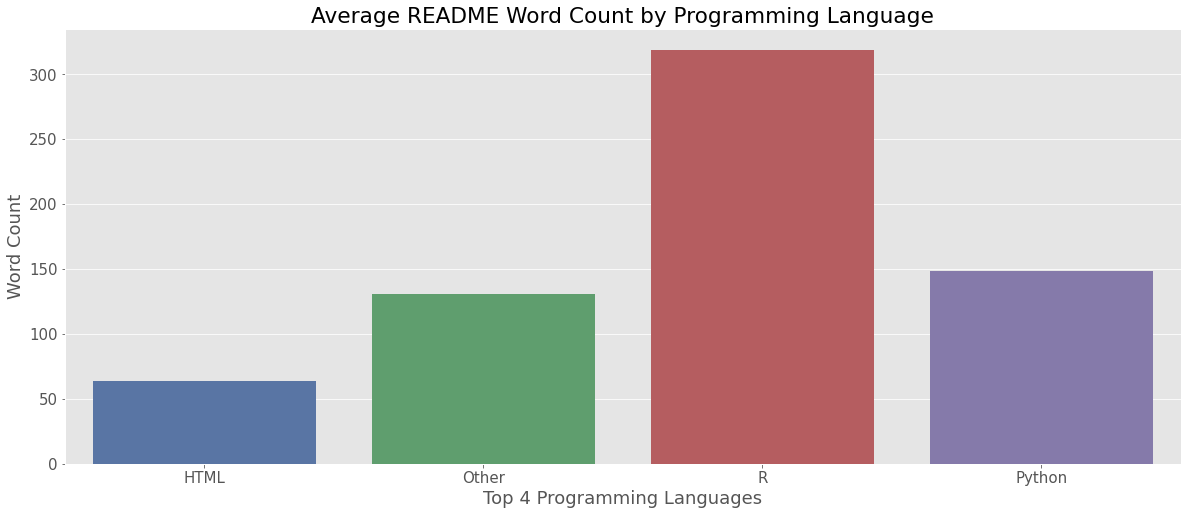

In [16]:
# create visualization using the vis_five function found in the explore.py
explore.vis_five()

In [17]:
train.groupby(['language']).word_count.agg(['min', 'mean', 'max'])

,min,mean,max
language,,,
HTML,1,63.769231,298
Other,7,131.062500,705
Python,1,148.235294,1229
R,14,319.000000,1284


#### Visualization Observations
It appears through the visualization and summary statistics that the R language has a significantly higher word count in the README documents, at 319 average, followed by Python at 148 average word count, Other at 131, and HTML at 63.  Statistical testing will be conducted to verify statistical relevance of observations.

---

#### Statistical Testing

In [18]:
# import for statistical testing
import scipy.stats as stats

##### Evaluate Assumptions
We are comparing the mean of 2 sub-samples. We will first evaluate for normal distribution using visualization and the shapiro test, then we will evaluate the length of both samples to evaluate size equivalency. 

- $H_0$: The variable IS normally distributed.
- $H_α$: The variable IS NOT normally distributed.

##### Visualization

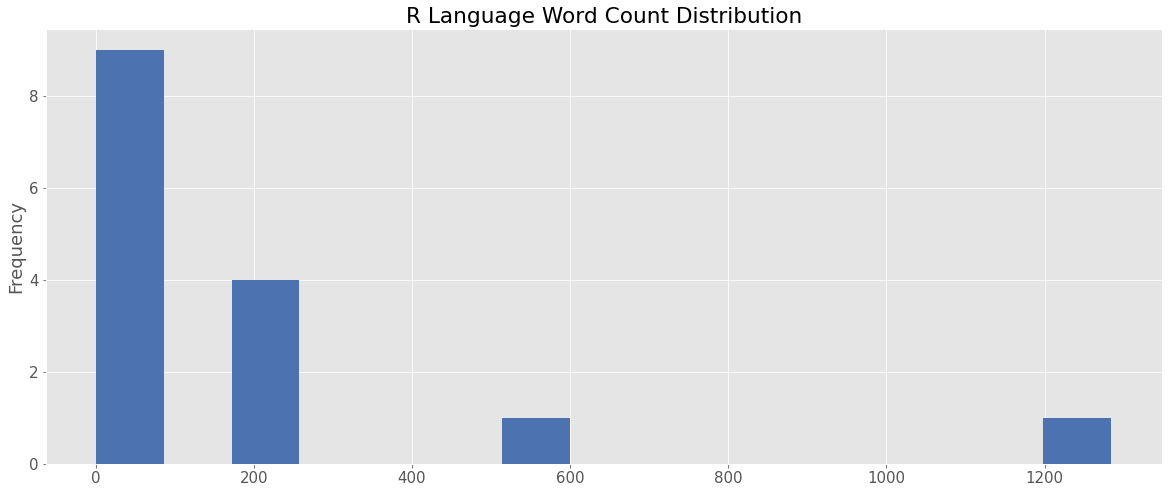

In [16]:
# we can graph the distribution of the word counts and see it is not normally distributed
train[train.language == 'R'].word_count.plot(kind='hist', x='word_count', bins = 15, title='R Language Word Count Distribution')
plt.show()

The visualization appears to be bi-modal and does does not have a normal distribution, therefore an ordinary T-Test is not appropriate for this context.

##### Shapiro Test for Normality

In [19]:
# assign variables for distribution/stats testing
r_distribution = stats.shapiro(train[train.language == 'R'].word_count)
all_other_distribution = stats.shapiro(train[train.language != 'R'].word_count)

print(f'Shapiro stats for R language: {r_distribution}')
print(f'Shapiro stats for all other languages: {all_other_distribution}')

Shapiro stats for R language: ShapiroResult(statistic=0.6387337446212769, pvalue=7.765278132865205e-05)
Shapiro stats for all other languages: ShapiroResult(statistic=0.6153308153152466, pvalue=1.405044396801669e-11)


The p-values are significant, indicating the assumption of normality is not met. 

##### Comparison on Sample Sizes

In [20]:
# Establish variables for statistical analysis
all_but_r = train[train.language != 'R'].word_count
r = train[train.language == 'R'].word_count

print(f'All Except R size: {all_but_r.shape}')
print(f'R size: {r.shape}')

All Except R size: (63,)
R size: (11,)


The sample sizes are not the same. 

---

##### Observation of Assumptions
Both of the variables have significant p-value results from the Shapiro test of normality, which means each variable violates the assumption of normality. Additionally, the visualization presented a bi-modal distribution and the sample sizes are not equal, therefore, the Mann Whitney is the correct hypotheis test to use to determine statistical relevance.

---

#### Mann Whitney Hypothesis Test

- $H_0$: Mean word count of README documents for R Programming = Mean word count of README documents for all other programming languages.
- $H_α$: Mean word count of README documents for R Programming != Mean word count of README documents for all other programming languages.

In [21]:
explore.mann_whitney()

Mann Whitney Test Statistics: Statistic  236.5, P Value 0.0981113242931169
We fail to reject $H_{0}$


#### Outcome of Hypothesis Testing
With our current sample size, we can't conclude that the difference in word count is statistically relevant based upon the results of hypothesis testing. In the future, we could collect more data to increase the sample size to determine more accurate statistical relevance. 

---

#### ANSWER 5: Word Counts
We can NOT say for sure whether average README word count for R is significantly different from average README word count for all other languages. According to visualizations and summary statistics, R language has a greater average word count. However, statistical testing did not identify a consequential relationship between README word count and programming language.

---

### EXPLORATION SUMMARY

Exploration revealed the 5 most frequently occurring words within the train corpus are: year, country, expectancy, life and data. It also identified Python had considerably more unique individual words and considerably more unique bigrams within the README files in comparison to the other top languages. When looking at bigrams unique to each of the top 4 programming languages, 'Other' seemed to focus on the features of the corpus itself, while Python README files focused on machine learning elements, HTML had file type and summary statistic references, and R utilized bigrams associated with scientific notation and R Programming statistical analysis methods. Lastly, the R language had the highest average word count within the README documents. 

This information will be utilized going forward into modeling to adjust hyperparameters based upon impactful features, primarily README word count, and unique bigrams. 


===

An Overview of the exploratory questions and answers follows:

##### 1. What are the most frequently occuring words?

The 5 most frequently occurring words within the train corpus are: year, country, expectancy, life and data. The words with the most frequency listed across all programming languages were code, project, age, file, year, expectancy, life, data, country, and model. The words that were not computer oriented, more focused on life expectancy and represented across the top four languages were age, year, expectancy, life, and country. The computer oriented words represented by the top four languages were code, project, file, data, and model. 

---
##### 2. Do certain coding languages have more unique words?

Python has considerably more unique words within the README files in comparison to the other top languages, with over 65, while Other and R have fewer than 5, and HTML has 0 unique words.   

---
##### 3. Do certain coding languages have more unique bigrams?

README documents utilizing Python Programming seem to have bigrams that frequently describe parts of the Data Science Pipeline that are more focused on the machine learning aspect, such as machine learning and feature selection. Otherwise, they focused on immunization rate and geographic statistics (per capita)

---
##### 4. Are there any bigrams that uniquely identify one of the coding langauges?

All 4 top programming languages shared the most prevalent bigram, 'life, expectancy', which aligns with the focus of selected documents, given the acquisition focused on repositories with the topic of life expectancy. Following the single most prevalent bigram, the remaining top 4 bigrams were unique to each langauge:


Other: 'sex,age', 'expectancy, sex', 'file,life', 'age, income'
- Given the frequency of gender, age, and income, the features of the corpus itself, seem to be a focus of the README labeled as Other
    

Python: 'machine, learning', 'per, capit', 'feature, selection', 'immunization, rates'
- README documents utilizing Python Programming seem to have bigrams that frequently describe parts of the Data Science Pipeline that are more focused on the machine learning aspect, such as machine learning and feature selection. Otherwise, they focused on immunization rate and geographic statistics (per capita)
   
  
HTML: 'rmd, file', 'mean, median', 'median, survival', 'html, file'
- HTML specific README documents had more focus on file types (rmd, html) and on summary statistics (mean, median) 


R: 'e,e', 'specie, standardised', 'brain, size', 'standardised, iucn'
- R utilizes the letter e as a bigram frequently. Without more context an e may represent Euler's number within scientific notation. R is commonly used in academic setting for research and statistical analysis which would lend itself to freqent use of scientific notation. Otherwise, R README documents used language specific to R Programming, such as standardised iucn, which may be reference to standardized scaling methodology in R and iucn, as in, IUCN Redlisting Tools, which perform a number of spatial analyses based on either observed occurrences or estimated ranges.
---
##### 5. Is word count within the README significantly different between the top 4 programming langauges?

According to visualizations and summary statistics, R language has a greater average word count at 319 words per README on average, followed by Python at 148 average word count, Other at 131, and HTML at 63. We can NOT say for sure whether average README word count for R is significantly different from average README word count for all other languages because statistical testing did not identify a consequential relationship between README word count and programming language.

=================================================================================================================================================================================================================================

## IV. MODEL

In [22]:
# Import for modeling
import model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

### Focus of Model Metrics

Because programming language is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training corpus and the models were evaluated on the validate corpus. The metrics used for model evaluation was accuracy, due to the multi-class classification approach. In other words, the model was optimized for identifying true positives, false positive, true negatives, and false negatives, therefore we focused on creating a model with the highest accuracy score from train to validate. 

_________________________

### Set X & y

In [23]:
# X and Y are set in model.py
# # make vectorizer
# tfidf = TfidfVectorizer()
# # fit the vectorizer to the data and make df
# X = tfidf.fit_transform(df["more_clean"])
# y = df["language"]

# split data into train and test
# X_train, X_validate, X_test, y_train, y_validate, y_test = prepare.split_data_xy(X, y)

# train = pd.DataFrame(dict(actual=y_train))
# validate = pd.DataFrame(dict(actual=y_validate))
# test = pd.DataFrame(dict(actual=y_test))

### Set Baseline

A baseline prediction was set by predicting all repositories will have 'Python' as the programming language. We will evaluate the accuracy of our models in comparrison to that baseline.

In [24]:
model.run_logistic_reg_models().head(1)

,model_number,model_type,train_accuracy,validate_accuracy,test_accuracy,better_than_baseline,baseline_accuracy,solver,C
0,baseline,baseline,0.418919,0.424242,0.407407,False,0.424242,NaN,NaN


#### The Type of Classification models built were 
- Decision Tree
- Random Forest
- Logistic Regression

The models were run with many trials, adjusting parameters and algorithms to find the best performing model.  

- All Logistic Regression models appeared to be overfit based upon their high performance on train accuracy compared to the significant drop off on validate accuracy.
    - This is in part due to the use of TF-IDF which analyzes each word in the train corpus and does not remove attributes.
- In general all models outperformed baseline, which had 42% accuracy on train and 41% accuracy on validate.
- The Logistic Regression Model that performed best had a c of 1000 and solver of 'lbfgs', with train accuracy of 98% and validate accuracy of 61% performing 19% better than baseline with validate. It was then applied to the un-seen test data with an accuracy of 56%.

### MODEL - DECISION TREE

In [25]:
decision_tree_models = model.run_decision_tree_models()
decision_tree_models.sort_values('validate_accuracy', ascending=False).drop(columns='test_accuracy').head(5)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,max_depth,baseline_accuracy
2,2,DecisionTreeClassifier,0.513514,0.454545,True,2,0.424242
5,5,DecisionTreeClassifier,0.72973,0.454545,True,5,0.424242
0,baseline,baseline,0.418919,0.424242,False,NaN,NaN
1,1,DecisionTreeClassifier,0.418919,0.424242,False,1,0.424242
4,4,DecisionTreeClassifier,0.662162,0.424242,False,4,0.424242


The Decision Tree model that performed the best on train & validate set had max_depth of 2, with 51% accuracy on train, and 45% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

### Model - RANDOM FOREST

In [26]:
rand_forest_models = model.run_random_forest_models()
rand_forest_models.sort_values('validate_accuracy', ascending=False).drop(columns='test_accuracy').head(3)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,max_depth,min_samples_leaf,criterion,baseline_accuracy
85,92,RandomForest,0.986486,0.484848,True,100,1,gini,0.424242
73,80,RandomForest,0.810811,0.484848,True,10,2,gini,0.424242
74,81,RandomForest,0.783784,0.484848,True,10,2,entropy,0.424242


The Random Forest model that performed the best on train & validate set had max_depth of 100 and min_sample_leaf of 1, with 99%  accuracy on train, and 48% accuracy on validate, so that model will be isolated below in the event it is the best performing model to be applied to the test (unseen) dataset. 

---

### Model - LOGISTIC REGRESSION

In [27]:
log_models= model.run_logistic_reg_models()
log_models.sort_values('validate_accuracy', ascending=False).drop(columns='test_accuracy').head(3)

,model_number,model_type,train_accuracy,validate_accuracy,better_than_baseline,baseline_accuracy,solver,C
21,126,LogisticRegression,0.986486,0.606061,True,0.424242,newton-cg,1000
6,111,LogisticRegression,0.986486,0.606061,True,0.424242,liblinear,100
14,119,LogisticRegression,0.986486,0.606061,True,0.424242,lbfgs,1000


Evaluating the model with the validate data set was done in the function above for comparrison. The Logistic Regression Model that performed best had a c-statistic of 1000 with a train accuracy of 99% and validate accuracy of 61% performing 19% better than baseline on unseen (validate) data.

### Best Performing Model Applied to Test Data (Unseen Data)

In [28]:
all_models = pd.concat([log_models, decision_tree_models, rand_forest_models])
all_models.sort_values(['validate_accuracy','test_accuracy'], ascending=False).head(1)

,model_number,model_type,train_accuracy,validate_accuracy,test_accuracy,better_than_baseline,baseline_accuracy,solver,C,max_depth,min_samples_leaf,criterion
14,119,LogisticRegression,0.986486,0.606061,0.555556,True,0.424242,lbfgs,1000,NaN,NaN,NaN


This model is expected to perform around 56-60% accuracy in the future on data it has not seen, given no major changes in the data source, which is equivalent to baseline prediction.

=========================================================================================================================================================================================

## V. CONCLUSION

The goal of this report was to build a Natural Language Processing (NLP) model that could predict the programming language of projects within specified GitHub repositories, given the text of a README.md file.  

Through the process of data acquisition, preparation, exploration, and statistical testing, it was determined programming language could be best predicted using: TF-IDF, Logistic Regression.

By using machine learning modeling, predictions to identify programming language were made with 56% accuracy using the best performing model. The Logistic Regression Model that performed best had a c-statistic of 1000 with a train accuracy of 99% and validate accuracy of 61% performing 19% better than baseline on unseen (validate) data.

### RECOMMENDATIONS

- USE THE IDENTIFIED DRIVERS of programming language: The data shows ________ have the largest impact on programming language. These features should be used going forward to predict programming language, as well as a starting point for conducting further analysis.  

- BUILD UPON MODEL PERFORMANCE: Although the ________ Model, with max depth and minimum leaf sample of 12 does predict programming language with ______\% accuracy on unseen data, the model ________ perform better than baseline and it could continue to be improved upon through deeper analysis of features and their impact on programming language. See next steps. 

- CONTINUE to PINPOINT FEATURES DRIVING programming language: This report focused on _____, _______, _______, and ___________ as initial contributors to programming language. It is recommended further analysis and modeling be done with additional features in order to create models with improved performance. 

In [ ]:
### NEXT STEPS

If given more time, we would like to:

- Eliminate more outliers to produce more accurate modeling/predictions.
- Explore the breakdown of 'Other" programming langauge to break apart and identify text which could predict more specified 'Other' languages.

- Downsample to decrease the quantity of the majority class (no programming language, Jupyter Notebook, or other) in order to better see the impact of features on the target.

- Increase number of repos to be analyzed to improve accuracy.

- Identify more precise populations within the data that have programming language. For instance, we would like to investigate:
    - Average word length within the README.md files (Since R is used often in academia, do they use bigger words?)
    - How often do unique to language words or bigrams appear in each README.md file and is this a good indicator of programming language?

===================================================================================================================================